## 1. Import libraries, test data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Mall_Customers.csv')

# We only care about the annual income and spending score
x = dataset.iloc[:, [3, 4]].values

## 2. Using the dendrogram to find the optimal number of clusters

Depending on where you cut the vertical line, you can choose `3` or `5` clusters.

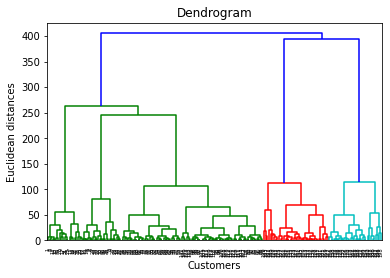

In [2]:
import scipy.cluster.hierarchy as sch

# Play around with "single", "average" and "ward" and see the difference
linkage_method = 'ward' 
dendrogram = sch.dendrogram(sch.linkage(x, method=linkage_method))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## 3. Training the Hierarchical Clustering model from selected k value

Note that "euclidean" works with "ward" linkage method.

In [3]:
from sklearn.cluster import AgglomerativeClustering

# Set to 3 and re-run to see difference
# Set to "manhattan" or "euclidean" to see difference
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage=linkage_method)
y_clusters = model.fit_predict(x)

## 4. Display graph and details

Each cluster are colored according to their respective colors.

No. of clusters:  5
No. of leaves:  200
Distance metric:  euclidean
Linkage method:  ward


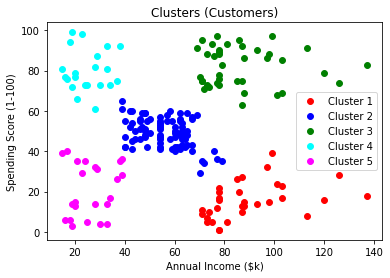

In [4]:
print('No. of clusters: ', model.n_clusters_)
print('No. of leaves: ', model.n_leaves_)
print('Distance metric: ', model.get_params()["affinity"])
print('Linkage method: ', model.get_params()["linkage"])

for i, label in enumerate([
    ('red', 'Cluster 1'),
    ('blue', 'Cluster 2'),
    ('green', 'Cluster 3'),
    ('cyan', 'Cluster 4'),
    ('magenta', 'Cluster 5')
]):
    plt.scatter(x[y_clusters == i, 0], x[y_clusters == i, 1], s=35, c=label[0], label=label[1])

plt.title('Clusters (Customers)')
plt.xlabel('Annual Income ($k)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()